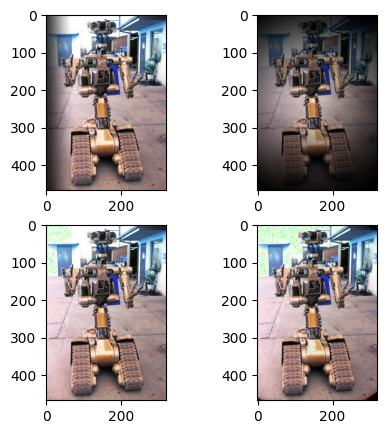

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def brightness_correction(f_xy, e_xy, c):
    # Brightness correction of image with brighttness failure of image and constant c
    fc_xy = cv2.cvtColor(e_xy, cv2.COLOR_BGR2GRAY)
    
    x, y = f_xy.shape[:2]
    g_xy = np.zeros_like(f_xy)
    for i in range(x):
        for j in range(y):
            if fc_xy[i, j] == 0:
                g_xy[i, j] = f_xy[i, j]
            else:
                g_xy[i, j] = c*(f_xy[i, j]/fc_xy[i, j])
    return g_xy


# 1. Na základě využití jasové korekce odstraňte z obrázků cv04_f01.bmp
# a cv04_f02.bmp poruchy cv04_e01.bmp a cv04_e02.bmp. c = 255.

plt.figure(figsize=(5, 5))

cv04_f01 = cv2.imread('cv04_f01.bmp')
cv04_f02 = cv2.imread('cv04_f02.bmp')
cv04_e01 = cv2.imread('cv04_e01.bmp')
cv04_e02 = cv2.imread('cv04_e02.bmp')

plt.subplot(2, 2, 1)
plt.imshow(cv04_f01)
plt.subplot(2, 2, 2)
plt.imshow(cv04_f02)

# 1. Brightness correction
c = 255
cv04_f01 = brightness_correction(cv04_f01, cv04_e01, c)
cv04_f02 = brightness_correction(cv04_f02, cv04_e02, c)

plt.subplot(2, 2, 3)
plt.imshow(cv04_f01)
plt.subplot(2, 2, 4)
plt.imshow(cv04_f02)

2. pro obrázek cv04_rentgen.bmp aplikujte histogramovou ekvalizaci dle vzorce q = T(p) = (q_k - q_0)/(N*M)
zobrazte původní a ekvalizovaný obrázek spolu s histogramy

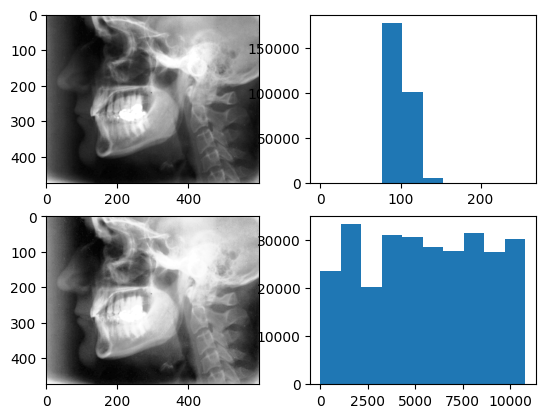

In [35]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def histogram_equalization(image):
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    image = np.asarray(image, dtype=np.uint8)
    flat = image.flatten()
    histogram, bins = np.histogram(flat, 256, [0,256])
    
    # Compute cumulative distribution function (CDF)
    cdf = histogram.cumsum()
    cdf_normalized = cdf * float(histogram.max()) / cdf.max()
    
    image_new = cdf_normalized[image]
    image_new = np.reshape(image_new, image.shape)
    return image_new

    
    
    


#plt.figure(figsize=(5, 5))
rentgen = cv2.imread('cv04_rentgen.bmp')
rentgen = cv2.cvtColor(rentgen, cv2.COLOR_BGR2RGB)
#hist = cv2.calcHist([rentgen], [0], None, [256], [0, 256])
eq_rentgen = histogram_equalization(rentgen)
#new_hist = cv2.calcHist([eq_rentgen], [0], None, [256], [0, 256])

plt.subplot(2, 2, 1)
plt.imshow(rentgen, cmap='gray')
plt.subplot(2, 2, 2)
plt.hist(rentgen.flatten(), range=(0, 256))
plt.subplot(2, 2, 3)
plt.imshow(eq_rentgen, cmap='gray')
plt.subplot(2, 2, 4)
plt.hist(eq_rentgen.flatten())

plt.show()


3. Z  obrázku  cv04c_robotC.bmp  spočítejte  2D  DFT  (fft2  = 
np.fft.fft2(gray))  a  zobrazte  amplitudové  spektrum,  upravte  kvadranty 
spektra, aby se nízké frekvence nacházely ve středu (vytvořte si pro tyto 
účely funkci) 

4. Filtrujte obraz pomocí filtrů DP, HP, jako masky použijte obrázky 
cv04c_filtHP.bmp, cv04c_filtHP1.bmp, cv04c_filtDP.bmp, 
cv04c_filtDP1.bmp. Obrázky si upravte jako matice s hodnotami 0, 1. 
Výsledky zobrazte spolu se spektrem. 

C:\Users\najma\AppData\Local\Temp\ipykernel_10136\667330200.py:43: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(np.abs(fft2_robot_hp)))
C:\Users\najma\AppData\Local\Temp\ipykernel_10136\667330200.py:48: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(np.abs(fft2_robot_hp1)))
C:\Users\najma\AppData\Local\Temp\ipykernel_10136\667330200.py:53: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(np.abs(fft2_robot_dp)))
C:\Users\najma\AppData\Local\Temp\ipykernel_10136\667330200.py:58: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(np.abs(fft2_robot_dp1)))


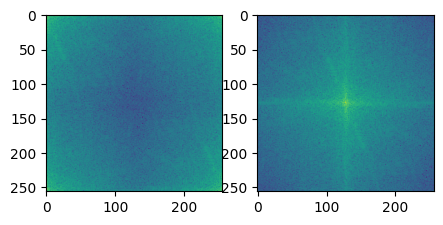

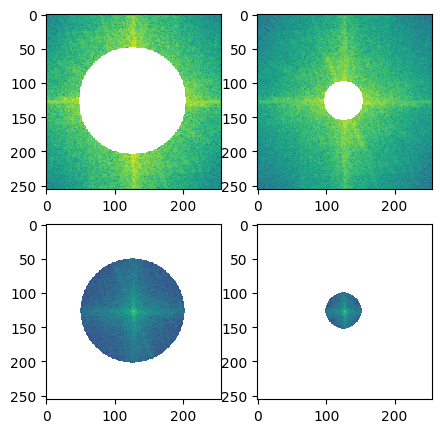

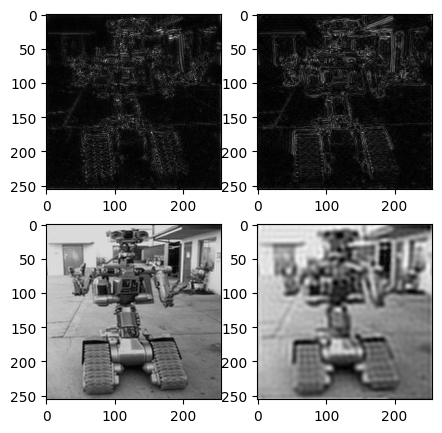

In [25]:
def zero_frequency_shift(fft2):
    # Shift the zero-frequency component to the center of the spectrum
    rows, cols = fft2.shape
    half_rows, half_cols = rows//2, cols//2
    
    # Rearrange the quadrants of fft2
    fft2_shift = np.zeros_like(fft2)
    fft2_shift[:half_rows, :half_cols] = fft2[half_rows:, half_cols:]
    fft2_shift[:half_rows, half_cols:] = fft2[half_rows:, :half_cols]
    fft2_shift[half_rows:, :half_cols] = fft2[:half_rows, half_cols:]
    fft2_shift[half_rows:, half_cols:] = fft2[:half_rows, :half_cols]
    
    return fft2_shift

def D2_DFT(image):
    # 2D Discrete Fourier Transform
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    fft2= np.fft.fft2(gray)
    # shift zero-frequency component to the center of the spectrum
    fft2_shift=zero_frequency_shift(fft2)
    return fft2_shift, fft2

cv4_robot = cv2.imread('cv04c_robotC.bmp')
fft2_robot_shift, fft2_robot  = D2_DFT(cv4_robot)
plt.figure(figsize=(5, 5))
plt.subplot(1, 2, 1)
plt.imshow(np.log(np.abs(fft2_robot)))
#plt spectrum of dff
plt.subplot(1, 2, 2)
plt.imshow(np.log(np.abs(fft2_robot_shift)))

# read filters and cast them to  1, 0 values
cv04_filtHP = cv2.cvtColor(cv2.imread('cv04c_filtHP.bmp'), cv2.COLOR_BGR2GRAY) / 255
cv04_filtHP1 = cv2.cvtColor(cv2.imread('cv04c_filtHP1.bmp'), cv2.COLOR_BGR2GRAY) / 255
cv04_filtDP = cv2.cvtColor(cv2.imread('cv04c_filtDP.bmp'), cv2.COLOR_BGR2GRAY) / 255
cv04_filtDP1 = cv2.cvtColor(cv2.imread('cv04c_filtDP1.bmp'), cv2.COLOR_BGR2GRAY) / 255


plt.figure(figsize=(5, 5))
# 4.1) High pass filter
fft2_robot_hp = fft2_robot_shift * cv04_filtHP
plt.subplot(2, 2, 1)
plt.imshow(np.log(np.abs(fft2_robot_hp)))

# 4.2) High pass filter 1
fft2_robot_hp1 = fft2_robot_shift * cv04_filtHP1
plt.subplot(2, 2, 2)
plt.imshow(np.log(np.abs(fft2_robot_hp1)))

# 4.3) Low pass filter
fft2_robot_dp = fft2_robot_shift * cv04_filtDP
plt.subplot(2, 2, 3)
plt.imshow(np.log(np.abs(fft2_robot_dp)))

# 4.4) Low pass filter 1
fft2_robot_dp1 = fft2_robot_shift * cv04_filtDP1
plt.subplot(2, 2, 4)
plt.imshow(np.log(np.abs(fft2_robot_dp1)))

plt.figure(figsize=(5, 5))
plt.subplot(2, 2, 1)
plt.imshow(np.abs(np.fft.ifft2(fft2_robot_hp)), cmap='gray')

plt.subplot(2, 2, 2)
plt.imshow(np.abs(np.fft.ifft2(fft2_robot_hp1)), cmap='gray')

plt.subplot(2, 2, 3)
plt.imshow(np.abs(np.fft.ifft2(fft2_robot_dp)), cmap='gray')

plt.subplot(2, 2, 4)
plt.imshow(np.abs(np.fft.ifft2(fft2_robot_dp1)), cmap='gray')